Homework 2: 
    https://github.com/fedhere/PUI2016_fb55/tree/master/HW2_fb55

Lab Resources:
    https://github.com/fedhere/PUI2016_fb55/blob/master/Lab2_fb55/NYCweatherAPI.py
    https://github.com/fedhere/PUI2016_fb55/blob/master/Lab2_fb55/APIreadingJson.py.ipynb
    https://github.com/fedhere/PUI2016_fb55/blob/master/Lab2_fb55/FormattingTables.ipynb
    https://github.com/fedhere/UInotebooks/tree/master/dataWrangling

Assignment 1: Script for python show_bus_locations.py MTAAPIKEY BUS_LINE
    API key and link from http://bustime.mta.info/wiki/Developers/SIRIVehicleMonitoring

Assignment 2: Script for python get_bus_info.py xxxx-xxxx-xxxx-xxxx-xxxx BUS_LINE BUS_LINE.csv

Assignment 3: Read CSV files with pandas

Note: Make sure to rename scripts to include "_netid"

In [1]:
from __future__ import print_function
import json
import urllib2
import os
import sys
import requests
import pylab as pl

import numpy as np
import pandas as pd

In [22]:
#fetch data from MTA
apikey = "b90f3cc1-5567-4fbf-9ef4-843de85a9a07" #x
BUS_LINE = "B52"
   
url = "http://bustime.mta.info/api/siri/vehicle-monitoring.json?"\
"key=" + apikey + "&VehicleMonitoringDetailLevel=calls&LineRef=" + BUS_LINE

response = urllib2.urlopen(url)
data = response.read().decode("utf-8")
data = json.loads(data)
data



{u'Siri': {u'ServiceDelivery': {u'ResponseTimestamp': u'2016-10-08T21:51:42.717-04:00',
   u'SituationExchangeDelivery': [],
   u'VehicleMonitoringDelivery': [{u'ResponseTimestamp': u'2016-10-08T21:51:42.717-04:00',
     u'ValidUntil': u'2016-10-08T21:52:42.717-04:00',
     u'VehicleActivity': [{u'MonitoredVehicleJourney': {u'Bearing': 338.6065,
        u'BlockRef': u'MTA NYCT_FP_D6-Saturday_A_FP_73980_B52-126',
        u'DestinationName': u'RIDGEWOOD TERM via GATES',
        u'DestinationRef': u'MTA_801117',
        u'DirectionRef': u'0',
        u'FramedVehicleJourneyRef': {u'DataFrameRef': u'2016-10-08',
         u'DatedVehicleJourneyRef': u'MTA NYCT_FP_D6-Saturday-129800_B52_126'},
        u'JourneyPatternRef': u'MTA_B520040',
        u'LineRef': u'MTA NYCT_B52',
        u'Monitored': True,
        u'MonitoredCall': {u'ExpectedArrivalTime': u'2016-10-08T21:51:43.717-04:00',
         u'ExpectedDepartureTime': u'2016-10-08T21:51:43.717-04:00',
         u'Extensions': {u'Distances': {

In [19]:
#Ser_Del = ServiceDelivery
Ser_Del = data['Siri']['ServiceDelivery'] 
#Veh_Act = VehicleActivity
Veh_Act = Ser_Del['VehicleMonitoringDelivery'][0]['VehicleActivity']
No_active_bus = len(Veh_Act)

print ('Bus Line: %s' %BUS_LINE)
print ('Number of Active Buses : %d' %No_active_bus)
for i in range(len(Veh_Act)):
    Long = Veh_Act[i]['MonitoredVehicleJourney']['VehicleLocation']['Longitude']
    Lat = Veh_Act[i]['MonitoredVehicleJourney']['VehicleLocation']['Latitude']
    print ('Bus %d is at latitude %r and longitude %r' %(i, Long, Lat))

Bus Line: B52
Number of Active Buses : 6
Bus 0 is at latitude -73.919614 and longitude 40.691991
Bus 1 is at latitude -73.974676 and longitude 40.686407
Bus 2 is at latitude -73.920936 and longitude 40.69064
Bus 3 is at latitude -73.920961 and longitude 40.690614
Bus 4 is at latitude -73.942612 and longitude 40.687132
Bus 5 is at latitude -73.980218 and longitude 40.68862


In [14]:
response = urllib2.urlopen(url)
data = response.read().decode("utf-8")
data = json.loads(data)
#print (type(data))
#print (data)
#Ser_Del = ServiceDelivery
Ser_Del = data['Siri']['ServiceDelivery'] 
#Veh_Act = VehicleActivity
Veh_Act = Ser_Del['VehicleMonitoringDelivery'][0]['VehicleActivity']
No_active_bus = len(Veh_Act)
print ('Bus Line: %s' %BUS_LINE)
print ('Number of Active Buses : %d' %No_active_bus)
for i in range(len(Veh_Act)):
    Long = Veh_Act[i]['MonitoredVehicleJourney']['VehicleLocation']['Longitude']
    Lat = Veh_Act[i]['MonitoredVehicleJourney']['VehicleLocation']['Latitude']
    print ('Bus %d is at latitude %r and longitude %r' %(i, Long, Lat))

Bus Line: B52
Number of Active Buses : 6
Bus 0 is at latitude -73.941625 and longitude 40.687245
Bus 1 is at latitude -73.976707 and longitude 40.687228
Bus 2 is at latitude -73.922366 and longitude 40.689455
Bus 3 is at latitude -73.922403 and longitude 40.689451
Bus 4 is at latitude -73.920784 and longitude 40.690796
Bus 5 is at latitude -73.977388 and longitude 40.687493


In [8]:
%run show_bus_locations.py b90f3cc1-5567-4fbf-9ef4-843de85a9a07 B52

Bus Line: B52
Number of Active Buses : 10
Bus 0 is at latitude -73.968932 and longitude 40.686351
Bus 1 is at latitude -73.972604 and longitude 40.685927
Bus 2 is at latitude -73.915081 and longitude 40.696606
Bus 3 is at latitude -73.920633 and longitude 40.690953
Bus 4 is at latitude -73.932814 and longitude 40.688264
Bus 5 is at latitude -73.972086 and longitude 40.685989
Bus 6 is at latitude -73.913321 and longitude 40.698398
Bus 7 is at latitude -73.959518 and longitude 40.686428
Bus 8 is at latitude -73.915673 and longitude 40.696004
Bus 9 is at latitude -73.989065 and longitude 40.692473


In [69]:
#Assignment 2

#Script worked on by Jianghao: https://github.com/jz2575

from __future__ import print_function
import pylab as pl
import json
import urllib2
import os
import sys
from sys import argv
import csv

#Name variables
VMD = 'VehicleMonitoringDelivery'
VA = 'VehicleActivity'
MVJ = 'MonitoredVehicleJourney'
VL = 'VehicleLocation'
OCs = 'OnwardCalls'
OC = 'OnwardCall'
PD = 'PresentableDistance'
SPN = 'StopPointName'

#Fetch data
script, apikey, BUS_LINE, BUSCSV = argv
fout = open(BUSCSV, "w+")
fout.write("Latitude,Longitude,Stop Name,Stop Status\n")
if not len(sys.argv) == 4:
        print ("Invalid number of arguments.")
        print ("Run as: python show_bus_locations.py MTA-KEY BUS-LINE")

url = "http://bustime.mta.info/api/siri/vehicle-monitoring.json?\
key=" + apikey + "&VehicleMonitoringDetailLevel=calls&LineRef=" + BUS_LINE
#print (url)
#url = "http://bustime.mta.info/api/siri/vehicle-monitoring.json?key
#=15631ece-ce07-4e77-87b4-d82e87563051&VehicleMonitoringDetailLevel=calls&LineRef=B52"

#review data
response = urllib2.urlopen(url)
data = response.read().decode("utf-8")
data = json.loads(data)
#print (type(data))
#print (data)

#pull data for one vehicle
va = data['Siri']['ServiceDelivery'][VMD][0][VA]
No_active_bus = len(va)
#print ('Bus Line: %s' %BUS_LINE)
#print ('Number of Active Buses : %d' %No_active_bus)



ValueError: need more than 3 values to unpack

In [68]:
#Pull vehicle status data
for i in range(len(va)):
    Long = va[i][MVJ][VL]['Longitude']
    Lat = va[i][MVJ][VL]['Latitude']
    if va[i][MVJ][OCs] == '':
        Pstop == 'N/A'
        StopName == 'N/A'
    else:
        PStop = va[i][MVJ][OCs][OC][0]['Extensions']['Distances'][PD]
        StopName = va[i][MVJ][OCs][OC][0][SPN]
    fout.write("%s,%s,%s,%s\n" %(Lat, Long, StopName, PStop))

#Output to csv    
fout.close()
with open(BUSCSV, 'r') as f:
    reader = csv.reader(f)
    for row in reader:
    	print (row)

NameError: name 'data' is not defined

In [10]:
%run  get_bus_info.py b90f3cc1-5567-4fbf-9ef4-843de85a9a07 B52 B52.csv

['Latitude', 'Longitude', 'Stop Name', 'Stop Status']
['40.686359', '-73.968863', 'GREENE AV/VANDERBILT AV', 'at stop']
['40.686919', '-73.944482', 'GATES AV/TOMPKINS AV', 'at stop']
['40.693977', '-73.917664', 'GATES AV/CENTRAL AV', 'approaching']
['40.687575', '-73.938796', 'GATES AV/MARCUS GARVEY BL', 'approaching']
['40.696153', '-73.990075', 'Tillary St (not used)', 'approaching']
['40.688279', '-73.932679', 'GATES AV/STUYVESANT AV', 'approaching']
['40.686672', '-73.966134', 'GREENE AV/WASHINGTON AV', 'approaching']
['40.692807', '-73.990846', 'CADMAN PLZ W/MONTAGUE ST', 'approaching']
['40.693379', '-73.918251', 'GATES AV/CENTRAL AV', 'approaching']


In [ ]:
#Assignment 3

from __future__ import print_function
import csv
import requests
import sys
import os

import numpy as np
from numpy.random import randn
import pylab as pl

from pandas import Series, DataFrame
import pandas
import pandas as pd
import matplotlib

#Check that an environmental variable DFDATA exists and that it points to 
#the data facility location /gws/open/NYCOpenData/nycopendata/data/
PUIdata = os.getenv("PUIDATA")
print (PUIdata)
dataDirect = "/gws/open/NYCOpenData/nycopendata/data"
dataSource = dataDirect + "/h9gi-nx95/1448475295/h9gi-nx95"
print (dataDirect)
print (dataSource)

In [ ]:
# setting up some preferences
%pylab inline

#np.set_printoptions(precision=4, threshold=500)
#np.random.seed(123321)
#pl.rc('figure', figsize=(10, 6))
#pd.options.display.max_rows = 10

In [ ]:
#Pull top 5 rows
df_dmv = pd.read_csv(dataSource)
df_dmv.head(n=5)

In [ ]:
#Truncate number of columns
col_list=['UNIQUE KEY', 'CONTRIBUTING FACTOR VEHICLE 1','LATITUDE','LONGITUDE'] 
df_accidentloc = df_dmv[col_list]
df_accidentloc.head(n=5)

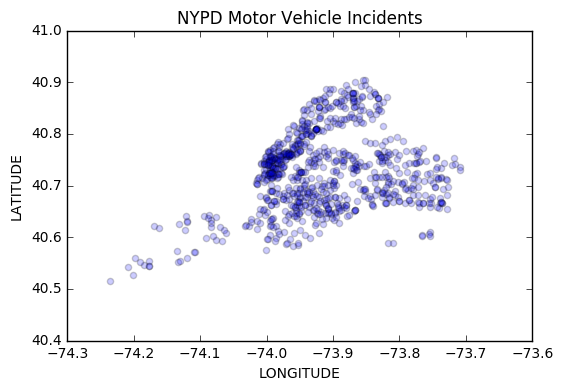

In [16]:
#Plot data
ax = df_accidentloc.head(n=1000).plot.scatter(x='LONGITUDE', y='LATITUDE', alpha=0.2)
ax.set_title("NYPD Motor Vehicle Incidents")

In [15]:
#Extra Credit
col_wDate=['UNIQUE KEY','DATE','TIME','NUMBER OF PERSONS INJURED','NUMBER OF MOTORIST KILLED'] 
df_accidentlocdate = df_dmv[col_wDate]
df_accidentlocdate.head(n=5)

UNIQUE KEY        DATE   TIME  NUMBER OF PERSONS INJURED  \
0     3339739  11/22/2015  14:13                          1   
1     3339506  11/22/2015  14:12                          0   
2     3339708  11/22/2015  14:10                          0   
3     3339267  11/22/2015  14:10                          0   
4     3339626  11/22/2015   6:40                          0   

   NUMBER OF MOTORIST KILLED  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0

In [ ]:
df_adate = pd.read_csv(dataSource, parse_dates=[['DATE', 'TIME']])
df_adate.head(n=10)

In [ ]:
#Plot data
ax = df_adate.head(n=10).plot.bar(x='DATE_TIME', y='NUMBER OF PERSONS INJURED', rot=90)
ax.xlabel('Date')
ax.set_title("NY Motor Number of Persons Injured from Vehicle Incidents 9/12/16 to 9/13/2016")

In [38]:
datetime.strftime?